<a href="https://colab.research.google.com/github/Sainimmala79/OIBSIP-TASK2/blob/main/Unemployment_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.shape

(768, 7)

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.columns=df.columns.str.strip()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [ ]:
df1.shape

(740, 7)

In [ ]:
import datetime as dt
import calendar

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Area'] = df1['Area'].astype('category')
df1 = df1.drop(['Frequency'],axis = 1)

<ipython-input-72-2f90abb7e1f6>:4: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-72-2f90abb7e1f6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-2f90abb7e1f6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

df1['Month_Name'] = df1['Month'].apply(lambda x : calendar.month_abbr[x])

In [ ]:
df1.head(10)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month,Month_Name
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,5,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,6,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,7,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,8,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,9,Sep
5,Andhra Pradesh,2019-10-31,3.52,12017412.0,43.01,Rural,2019,10,Oct
6,Andhra Pradesh,2019-11-30,4.12,11397681.0,41.00,Rural,2019,11,Nov
7,Andhra Pradesh,2019-12-31,4.38,12528395.0,45.14,Rural,2019,12,Dec
8,Andhra Pradesh,2020-01-31,4.84,12016676.0,43.46,Rural,2020,1,Jan
9,Andhra Pradesh,2020-02-29,5.91,11723617.0,42.83,Rural,2020,2,Feb


In [ ]:
df1.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year,Month
count,740,740.000000,7.400000e+02,740.000000,740.000000,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,2019.418919,6.390541
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,2019.000000,1.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,2019.000000,4.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,2019.000000,6.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,2020.000000,9.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,2020.000000,12.000000
std,NaN,10.721298,8.087988e+06,8.111094,0.493716,3.235070


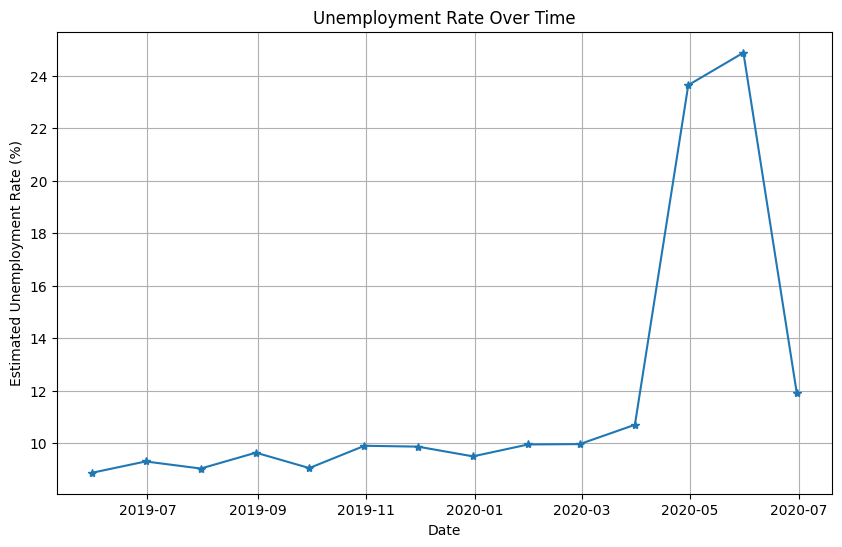

In [ ]:
mean_unemployment_over_time = df1.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(10, 6))

plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='*', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

In [ ]:
fig = px.bar(df1, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [ ]:
fig = px.sunburst(df1, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area',template='ggplot2')
fig.show()

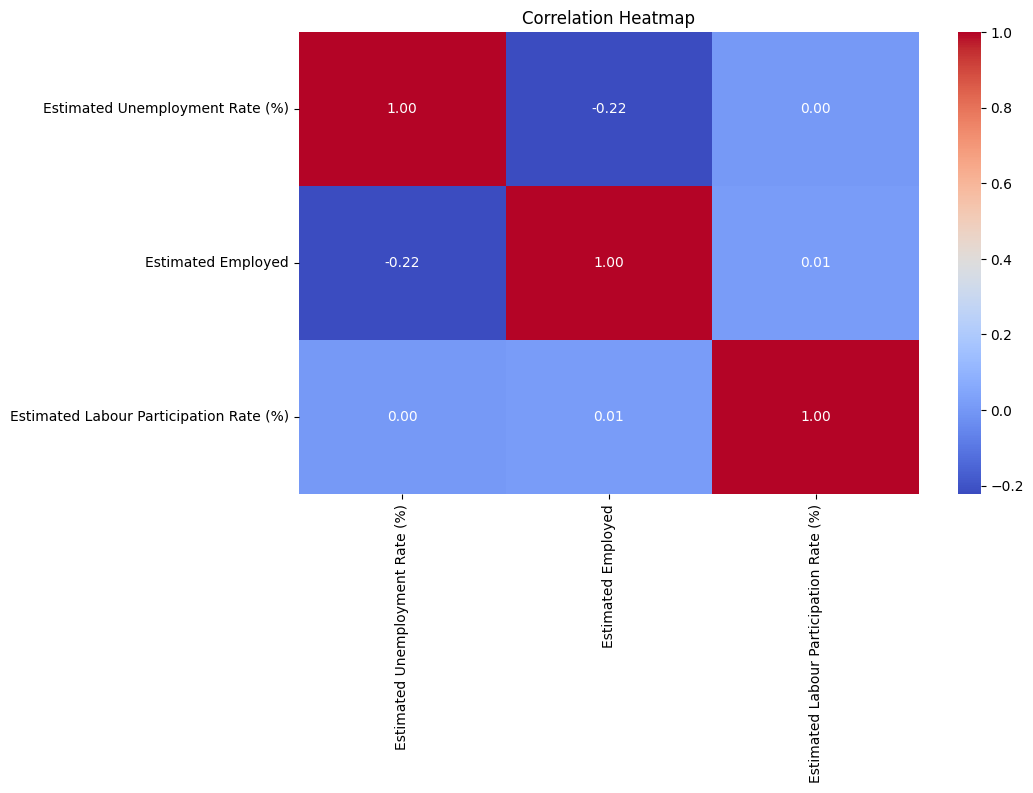

In [ ]:
correlation = df1[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
area_desc = df.groupby(['Area'])[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
round(area_desc.describe(),2).T

Area                                                 Rural        Urban
Estimated Unemployment Rate (%)         count       359.00       381.00
                                        mean         10.32        13.17
                                        std          10.04        11.17
                                        min           0.00         0.00
                                        25%           3.79         5.82
                                        50%           6.76         9.97
                                        75%          13.76        18.04
                                        max          74.51        76.74
Estimated Employed                      count       359.00       381.00
                                        mean   10192852.57   4388625.58
                                        std     9847886.12   4411701.68
                                        min       49420.00     64538.00
                                        25%     2022981.00    778590.00
                                        50%     7508747.00   2821456.00
                                        75%    14752574.00   5756475.00
                                        max    45777509.00  17486683.00
Estimated Labour Participation Rate (%) count       359.00       381.00
                                        mean         44.46        40.90
                                        std           8.85         6.92
                                        min          13.33        20.51
                                        25%          39.05        37.42
                                        50%          42.56        40.21
                                        75%          48.15        44.18
                                        max          72.57        72.26

<ipython-input-91-2d8bab53f8f3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




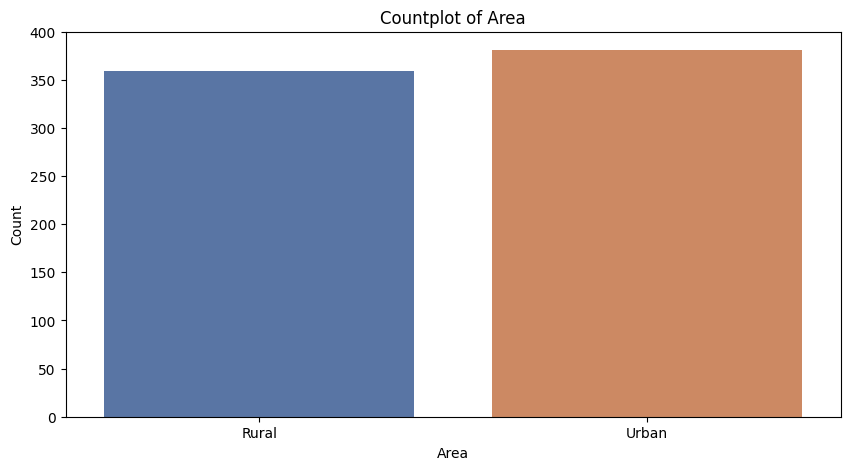

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Area', data=df1,palette='deep')
plt.title('Countplot of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

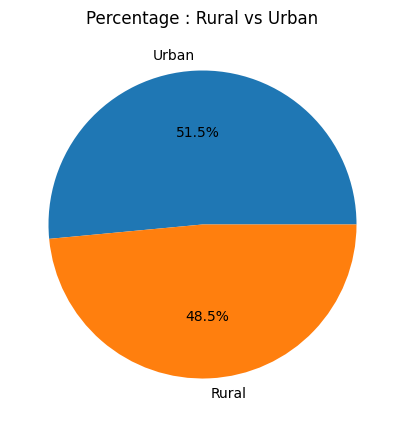

In [ ]:
plt.figure(figsize=[6, 5])
plt.pie(df1['Area'].value_counts(), labels=df['Area'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage : Rural vs Urban')
plt.show()

In [ ]:
fig = px.bar(df1, x = 'Month_Name', y = 'Estimated Employed', color = 'Month_Name', title = 'Estimated Employed People')
fig.show()

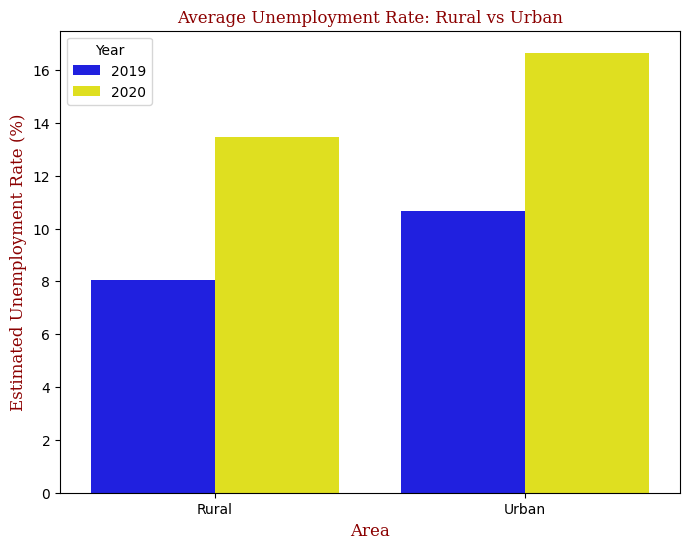

In [ ]:
plt.figure(figsize = [8,6])
palette ={2019: "blue", 2020: "yellow"}
sns.barplot(data = df1, x = 'Area', y="Estimated Unemployment Rate (%)", estimator='mean', hue='Year', errorbar=None, palette=palette)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
plt.xlabel('Area', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Average Unemployment Rate: Rural vs Urban', fontdict=font)
plt.show()

In [ ]:
before_lockdown = df1[(df1['Month'] >= 4) & (df1['Month'] <= 6) & (df1['Year'] ==2019)]
after_lockdown = df1[(df1['Month'] >= 4) & (df1['Month'] <= 6) & (df1['Year'] ==2020)]

bf_ldown= before_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
af_ldown = after_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

combined_df = pd.merge(bf_ldown, af_ldown, on='Region')

combined_df.columns=['Region','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
combined_df.head()

,Region,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,4.1475,15.778333
1,Assam,6.7825,6.388000
2,Bihar,13.1650,36.988333
3,Chandigarh,15.3750,7.220000
4,Chhattisgarh,9.5300,14.846667


In [ ]:
print(combined_df)

              Region  Unemployment Rate Before Lockdown  \
0     Andhra Pradesh                             4.1475   
1              Assam                             6.7825   
2              Bihar                            13.1650   
3         Chandigarh                            15.3750   
4       Chhattisgarh                             9.5300   
5              Delhi                            11.7400   
6                Goa                             6.1100   
7            Gujarat                             4.5125   
8            Haryana                            20.6775   
9   Himachal Pradesh                            14.3550   
10   Jammu & Kashmir                            16.9475   
11         Jharkhand                            13.3275   
12         Karnataka                             5.7500   
13            Kerala                             7.1025   
14    Madhya Pradesh                             4.5425   
15       Maharashtra                             5.1375 